# Mini Hackathon - Week 2

This week, you will build on the dataset from last week.  You'll continue doing exploratory data analysis to examime the questions of whether meteor strikes vary by US states, the area in which people observe the strikes or the number of potential observers.

To explore these questions, you'll make heavy use of Python's `pandas` and `geopandas` libraries to crunch the data so that you can examine it.  You'll create [choropleths](https://en.wikipedia.org/wiki/Choropleth_map) to visualize your data and gain insight into it.

To keep matters simple in terms of data gathering and visualization, you'll look at meteor strikes just within the continental United States (the lower 48 states)

In many of the code cells below, you'll see assignment statements of the form: `xx = None`. Replace the `None` with your calculations for what's being called for.

In [1]:
import pandas as pd
import numpy as np
import json
import urllib.request
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

## Get the Meteor Strikes Database

In [2]:
# Data from NASA on meteorite landings
url = "https://data.nasa.gov/resource/y77d-th95.json"

Use `pandas.read_json()` to download the data set. [hint](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html)

In [3]:
ms_df = pd.read_json(url)

In [4]:
ms_df.head()

,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,fall,geolocation,id,mass,name,nametype,recclass,reclat,reclong,year
0,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [6.08333, 50....",1,21.0,Aachen,Valid,L5,50.77500,6.08333,1880-01-01T00:00:00.000
1,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [10.23333, 56...",2,720.0,Aarhus,Valid,H6,56.18333,10.23333,1951-01-01T00:00:00.000
2,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [-113, 54.216...",6,107000.0,Abee,Valid,EH4,54.21667,-113.00000,1952-01-01T00:00:00.000
3,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",10,1914.0,Acapulco,Valid,Acapulcoite,16.88333,-99.90000,1976-01-01T00:00:00.000
4,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [-64.95, -33....",370,780.0,Achiras,Valid,L6,-33.16667,-64.95000,1902-01-01T00:00:00.000


## Convert to Geopandas Dataframe

To plot these meteor strikes on a map, we need a geopandas dataframe.  Therefore we need point that we can plot for each meteor strike, i.e. each row in the `ms_df` dataframe.
Fortunately the `ms_df` dataframe comes with two columns: `reclong` and `reclat` which provide the coordinates of each strike.

In the code below, first create a list of points by looping each row in the `ms_df`dataframe.  You'll find the [Point](https://toblerity.org/shapely/shapely.geometry.html#module-shapely.geometry.point) function useful for this purpose.
Then create a GeoDataFrame passing your list of points as the geometry argument.

Just use the `crs` (coordinate reference system) value as specified below.

In [5]:
from shapely.geometry import Point
pts = [Point(l.reclong, l.reclat) for l in ms_df.itertuples()]

crs = {'init': 'epsg:4269'}
ms_gdf = gpd.GeoDataFrame(ms_df, crs=crs, geometry=pts)

Plot it out to see what you have

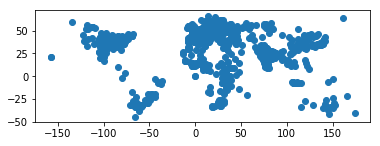

In [6]:
ms_gdf.plot()

Meteor strikes all over the world!

## Download Shapefile of US States

Since we're looking at our data rolled up to a (US) state level, we need to get a shapefile of the states.
The code below extracts a low-resolution state shapefile from the US Census Bureau.

In [7]:
sf_url = "http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip"

In [8]:
from zipfile import ZipFile
from urllib.request import urlretrieve
from tempfile import mktemp

filename = mktemp('.zip')
destDir = './US_Shapefile'

sf_url = "http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip"
name, hdrs = urlretrieve(sf_url, filename)
thefile=ZipFile(filename)
thefile.extractall(destDir)
thefile.close()

In [9]:
sf_path = destDir + '/cb_2017_us_state_20m.shp'
us_state_sf = gpd.read_file(sf_path)

Use the plot() method on the us_state_sf geodataframe to see what it looks like.

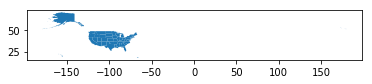

In [10]:
us_state_sf.plot()

Clip the plot by using set_xlim and set_ylim to the coordinates for the lower left and upper right corners for the continental US.

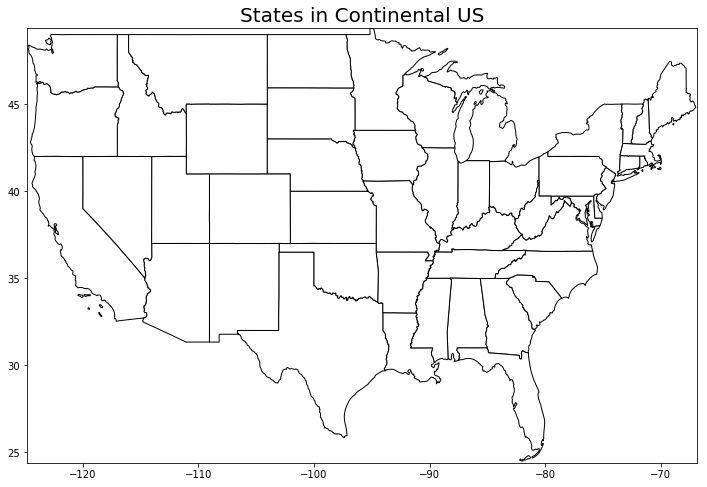

In [11]:
#from Google, coords for continental US:
x0,y0 = (-124.848974, 24.396308) # lower left corner
x1,y1 = (-66.885444, 49.384358) # Upper right corner

fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim(x0,x1)
ax.set_ylim(y0,y1)
us_state_sf.plot(ax=ax,facecolor="white",edgecolor="black")
plt.title('States in Continental US', size=20)

In [12]:
us_state_sf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,02,01785533,0400000US02,02,AK,Alaska,00,1478588231566,277723861311,"(POLYGON ((-173.074642 60.704657, -172.912636 ..."
1,06,01779778,0400000US06,06,CA,California,00,403483182192,20484637928,"(POLYGON ((-118.593969 33.467198, -118.484785 ..."
2,08,01779779,0400000US08,08,CO,Colorado,00,268425964573,1178495763,"POLYGON ((-109.059962 38.499987, -109.05996197..."
3,11,01702382,0400000US11,11,DC,District of Columbia,00,158351639,18675956,"POLYGON ((-77.119759 38.934343, -77.0410179999..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.243027 44.390974, -117.215072 4..."


Make sure the coordinate reference system of the shapefile matches that of the geodataframe you made earlier

In [13]:
(us_state_sf.crs, ms_gdf.crs)

({'init': 'epsg:4269'}, {'init': 'epsg:4269'})

## State Population DataFrame

The Census Bureau provides population estimates for the year 2017 by state.  There are various interfaces for obtaining these which are beyond the scope of this exercise. For simplicity, the state level estimates have already been downloaded are available in the US_Population_Data folder in the repo.

Use `panadas.csv_read` to bring the population estimates into your workspace.

In [14]:
pop_path = './US_Population_Data/PEP_2017_PEPANNRES_with_ann.csv'
US_pop = pd.read_csv(pop_path)

In [15]:
US_pop.head()

,GEO.id,GEO.id2,GEO.display-label,respop72017
0,Id,Id2,Geography,Population Estimate (as of July 1) - 2017
1,0400000US01,01,Alabama,4874747
2,0400000US02,02,Alaska,739795
3,0400000US04,04,Arizona,7016270
4,0400000US05,05,Arkansas,3004279


Perform the following clean up:
1. Get rid of the first row
2. Rename the columns to: GEOID, GEOID2, State and Pop2017
3. Convert the Pop2017 column to a float from a string
4. Lose the non-continental states: AK, HI and PR

In [16]:
# ditch the first row by using .drop(inplace=True)
US_pop.drop([0], inplace=True)

In [17]:
#create a dictionary to map old colname into new colname
coldict = {"GEO.id": "GEOID",
           "GEO.id2": "GEOID2",
           "GEO.display-label":"State",
           "respop72017":"Pop2017"}

#use .rename(inplace=True to rename the columns)
US_pop.rename(index=str, columns=coldict, inplace=True)

In [18]:
#convert the Pop2017 column from string to float
US_pop['Pop2017'] = US_pop.Pop2017.astype('float64')

In [19]:
US_pop.head()

,GEOID,GEOID2,State,Pop2017
1,0400000US01,01,Alabama,4874747.0
2,0400000US02,02,Alaska,739795.0
3,0400000US04,04,Arizona,7016270.0
4,0400000US05,05,Arkansas,3004279.0
5,0400000US06,06,California,39536653.0


In [20]:
#non-continental and non-states:
non_cont = ['District of Columbia', 'Puerto Rico', 'Alaska', 'Hawaii']

In [21]:
US_pop = US_pop.query('State not in @non_cont')

In [22]:
len(US_pop)

48

In [23]:
US_pop.columns

Index(['GEOID', 'GEOID2', 'State', 'Pop2017'], dtype='object')

Output should be:
> Index(['GEOID', 'GEOID2', 'State', 'Pop2017'], dtype='object')

In [24]:
us_state_sf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,02,01785533,0400000US02,02,AK,Alaska,00,1478588231566,277723861311,"(POLYGON ((-173.074642 60.704657, -172.912636 ..."
1,06,01779778,0400000US06,06,CA,California,00,403483182192,20484637928,"(POLYGON ((-118.593969 33.467198, -118.484785 ..."
2,08,01779779,0400000US08,08,CO,Colorado,00,268425964573,1178495763,"POLYGON ((-109.059962 38.499987, -109.05996197..."
3,11,01702382,0400000US11,11,DC,District of Columbia,00,158351639,18675956,"POLYGON ((-77.119759 38.934343, -77.0410179999..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.243027 44.390974, -117.215072 4..."


## Merge Population data into State Shapefile

Here, you'll create a new shapefile by combining the population data for the lower 48 states with the US shapefile from the Census Bureau.  The result of the merge needs to be a geodataframe (so you can plot it later) so the left side of the merge needs to be the `us_state_sf` data frame from above. But the result of the merge should be just the lower 48 states, i.e. those states in the `US_pop` dataframe. You can accomplish this by doing an sql-like `right` join.  See the 'how' parameter of [pandas.merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html). Note `merge` works on geopandas dataframes too.

In [25]:
cont_us = us_state_sf.merge(US_pop, how="right", right_on = 'GEOID', left_on='AFFGEOID')

In [26]:
type(cont_us)

geopandas.geodataframe.GeoDataFrame

Plot it out to see what you have

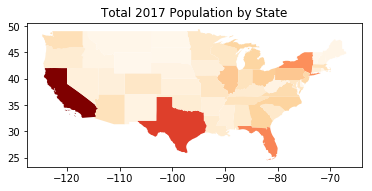

In [27]:
cont_us.plot(column='Pop2017',cmap='OrRd')
plt.title('Total 2017 Population by State')

Choropleths work better if plotting density or rates, otherwise the area size of the objects misleads interpretation. So compute and plot population density below.

In [28]:
sq_miles_per_sq_meter =  3.86102e-7 # thank you Google
cont_us['PopDensity'] = cont_us.Pop2017/(cont_us.ALAND.astype('float64')*sq_miles_per_sq_meter)

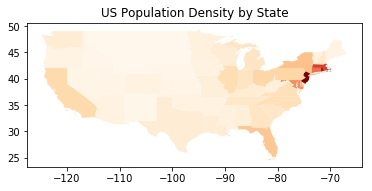

In [29]:
cont_us.plot(column='PopDensity',cmap='OrRd')
plt.title('US Population Density by State')

## Map Meteor Strikes to States

You will use a **spatial join** to compute in which state each meteor strike occurred. See the `geopandas` document: [Merging Data](http://geopandas.org/mergingdata.html) to learn the difference between attribute and spatial joins.

**Note:** the code below may seem a bit backwards as to whether we're doing a left- versus a right- join.  This is because the obvious way - an inner join of states to meteor strikes -- encounters a problem.  So the code is written as a right join and subsequently deletes all of the records where the GEOIDs didn't match.

In the code below, do a right-spatial join of the `cont_us` shapefile geodataframe with the `ms_gdf` geodataframe, using the 'intersects' operation.  Since it is a right join, the result will have a record for each of the meteor strikes, however many/most of the records will have a null/NaN value for state for those strikes that happened outside the continental US.

In [30]:
meteors_in_states = gpd.sjoin( cont_us, ms_gdf, how="right", op='intersects')

C:\Users\kevin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2831: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [31]:
len(meteors_in_states)

1000

In [32]:
#ditch the meteor records that have no state
meteors_in_states.dropna(inplace=True, axis=0, subset = ['State'])

In [33]:
len(meteors_in_states)

132

See what you have

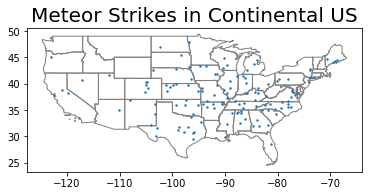

In [34]:
fig, ax = plt.subplots()
ax.set_aspect('equal') # so that the plots layer properly

# states as the first layer
cont_us.plot(ax=ax, facecolor='None', edgecolor='grey')

# meteor strikes as the second layer
meteors_in_states.plot(ax=ax,markersize=2)


plt.title('Meteor Strikes in Continental US',size=20)

### Count up the Meteor Strikes by State

Aggregate to the state level by counting the meteor strikes within each state. You'll find pandas `groupby` and `size` methods useful. Also, note that aggregating using `size` returns a pandas `Series` object so for later purposes you'll want this to be a `DataFrame`. Use the `to_frame()` method to accomplish this. Finally, name the resulting meteor strike count column as 'MeteorStrikes'.

Your code should resemble:
> meteors_in_states.groupby(...).size().to_frame().rename(...)

In [35]:
meteors_by_states = meteors_in_states.groupby('AFFGEOID').size().to_frame().rename(index=str,columns={0:'MeteorStrikes'})

In [36]:
meteors_by_states.head()

,MeteorStrikes
AFFGEOID,
0400000US01,6
0400000US04,1
0400000US05,6
0400000US06,3
0400000US08,5


## Merge the Strikes by States into the States geodataframe

Do a left-join to merge the strikes info the states.  Left join because you want a record for each state even if there were no strikes within that state.  The states that didn't have any strikes will have a NaN in the 'MeteorStrike' column; these NaNs will need to be replaced with zeros, otherwise the plotting routines will complain.

In [37]:
cont_us = cont_us.merge(meteors_by_states, how='left', left_on='AFFGEOID', right_index=True)
cont_us = cont_us.fillna(value={'MeteorStrikes':0})

In [38]:
cont_us.MeteorStrikes.isnull().sum()

0

## Compute Meteor Strikes Rates

Choropleths work better if they display densities or rates. So here you'll compute each state's rate of meteor strikes per 100,000 residents and meteor strike density per square mile.

In [39]:
cont_us['MSsqmi'] = cont_us.MeteorStrikes/(cont_us.ALAND.astype('float64')*sq_miles_per_sq_meter)
cont_us['MS100k'] = 100000.0*cont_us.MeteorStrikes/cont_us.Pop2017

## Plot It All Out (Finally!)

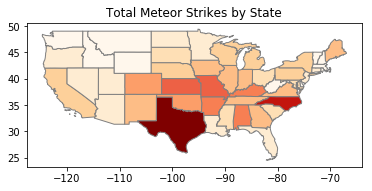

In [40]:
cont_us.plot('MeteorStrikes', cmap='OrRd', edgecolor='grey')
plt.title('Total Meteor Strikes by State')

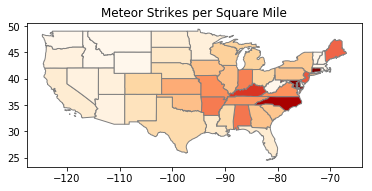

In [41]:
cont_us.plot('MSsqmi', cmap='OrRd', edgecolor='grey')
plt.title('Meteor Strikes per Square Mile')

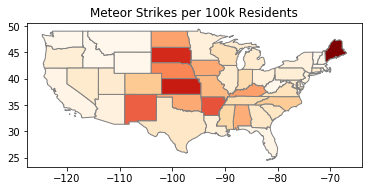

In [42]:
cont_us.plot('MS100k', cmap='OrRd', edgecolor='grey')
plt.title('Meteor Strikes per 100k Residents')